Projet Traitment de donnée

Importing libraries, such as pandas to transform the DataSet (csv) into a DataFrame, numpy vectorize the DataFrame, matplotlib to plot the linear regression of the model, Sklearn to to do a simple lienar regression, mpl_toolkit for eventually 3D plots and seaborn for the data correlation heatmap.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

REadung the DataSet and transforming it into a pandas DataFrame, extracting non-numeric data and printing out the correlation.

In [62]:
filename = "../data/spotify.csv"

with open(filename, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

df = pd.read_csv(filename, encoding=encoding)

print(encoding)
df_num = df.select_dtypes(include=['number'])
corr = df_num.corr()

corr

utf-8


Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.032142    -0.032743      0.003444 -0.055994   
popularity          0.032142    1.000000    -0.007101      0.035448  0.001056   
duration_ms        -0.032743   -0.007101     1.000000     -0.073426  0.058523   
danceability        0.003444    0.035448    -0.073426      1.000000  0.134325   
energy             -0.055994    0.001056     0.058523      0.134325  1.000000   
key                -0.005520   -0.003853     0.008114      0.036469  0.048006   
loudness           -0.027307    0.050423    -0.003470      0.259077  0.761690   
mode                0.005107   -0.013931    -0.035556     -0.069219 -0.078362   
speechiness        -0.084952   -0.044927    -0.062600      0.108626  0.142509   
acousticness        0.076840   -0.025472    -0.103788     -0.171533 -0.733906   
instrumentalness   -0.070286   -0.095139     0.124371     -0.185606 -0.181879   
liveness            0.033639   -0.005387     0.010321     -0.131617  0.184796   
valence             0.053111   -0.040534    -0.154479      0.477341  0.258934   
tempo              -0.025824    0.013205     0.024346     -0.050450  0.247851   
time_signature     -0.021115    0.031073     0.018225      0.207218  0.187126   

                       key  loudness      mode  speechiness  acousticness  \
Unnamed: 0       -0.005520 -0.027307  0.005107    -0.084952      0.076840   
popularity       -0.003853  0.050423 -0.013931    -0.044927     -0.025472   
duration_ms       0.008114 -0.003470 -0.035556    -0.062600     -0.103788   
danceability      0.036469  0.259077 -0.069219     0.108626     -0.171533   
energy            0.048006  0.761690 -0.078362     0.142509     -0.733906   
key               1.000000  0.038590 -0.135916     0.020418     -0.040937   
loudness          0.038590  1.000000 -0.041764     0.060826     -0.589803   
mode             -0.135916 -0.041764  1.000000    -0.046532      0.095553   
speechiness       0.020418  0.060826 -0.046532     1.000000     -0.002186   
acousticness     -0.040937 -0.589803  0.095553    -0.002186      1.000000   
instrumentalness -0.006823 -0.433477 -0.049955    -0.089616      0.104027   
liveness         -0.001600  0.076899  0.014012     0.205219     -0.020700   
valence           0.034103  0.279848  0.021953     0.036635     -0.107070   
tempo             0.010917  0.212446  0.000566     0.017273     -0.208224   
time_signature    0.015065  0.191992 -0.024092    -0.000011     -0.176138   

                  instrumentalness  liveness   valence     tempo  \
Unnamed: 0               -0.070286  0.033639  0.053111 -0.025824   
popularity               -0.095139 -0.005387 -0.040534  0.013205   
duration_ms               0.124371  0.010321 -0.154479  0.024346   
danceability             -0.185606 -0.131617  0.477341 -0.050450   
energy                   -0.181879  0.184796  0.258934  0.247851   
key                      -0.006823 -0.001600  0.034103  0.010917   
loudness                 -0.433477  0.076899  0.279848  0.212446   
mode                     -0.049955  0.014012  0.021953  0.000566   
speechiness              -0.089616  0.205219  0.036635  0.017273   
acousticness              0.104027 -0.020700 -0.107070 -0.208224   
instrumentalness          1.000000 -0.079893 -0.324312 -0.050330   
liveness                 -0.079893  1.000000  0.019086  0.000600   
valence                  -0.324312  0.019086  1.000000  0.078273   
tempo                    -0.050330  0.000600  0.078273  1.000000   
time_signature           -0.082580 -0.023651  0.133686  0.066641   

                  time_signature  
Unnamed: 0             -0.021115  
popularity              0.031073  
duration_ms             0.018225  
danceability            0.207218  
energy                  0.187126  
key                     0.015065  
loudness                0.191992  
mode                   -0.024092  
speechiness            -0.000011  
acousticness           -0.176138  
instrumentalne

Plotting the Heatmap using seaborn and matplotlib, and saving it in a png file.

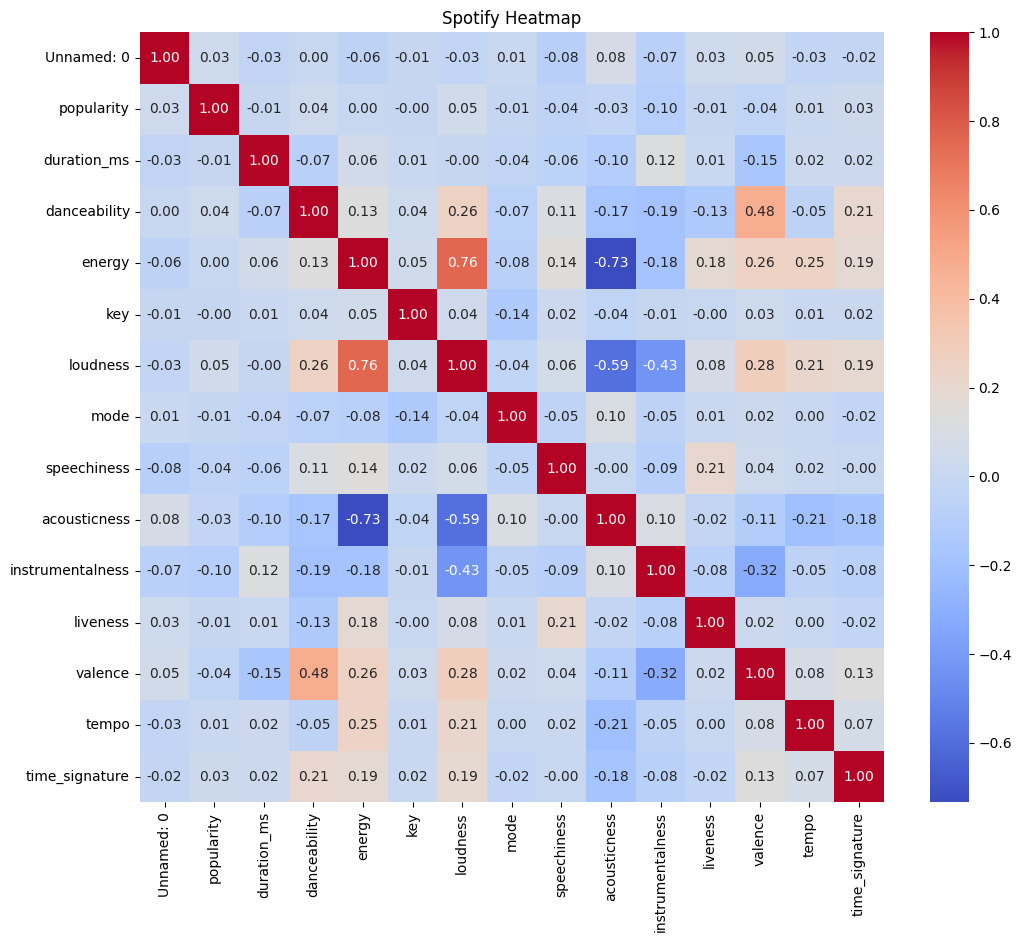

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Spotify Heatmap')


plt.savefig('heatmap.png')

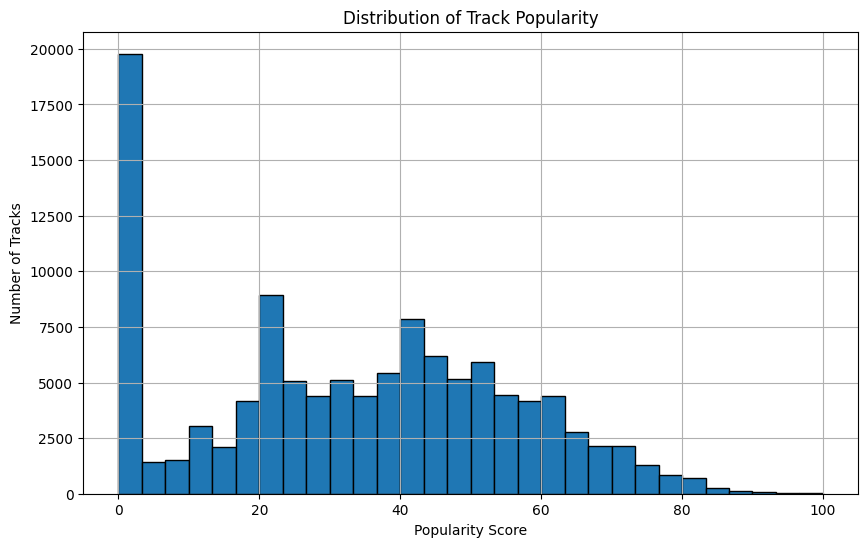

In [60]:
plt.figure(figsize=(10,6))
plt.hist(df['popularity'], bins=30, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

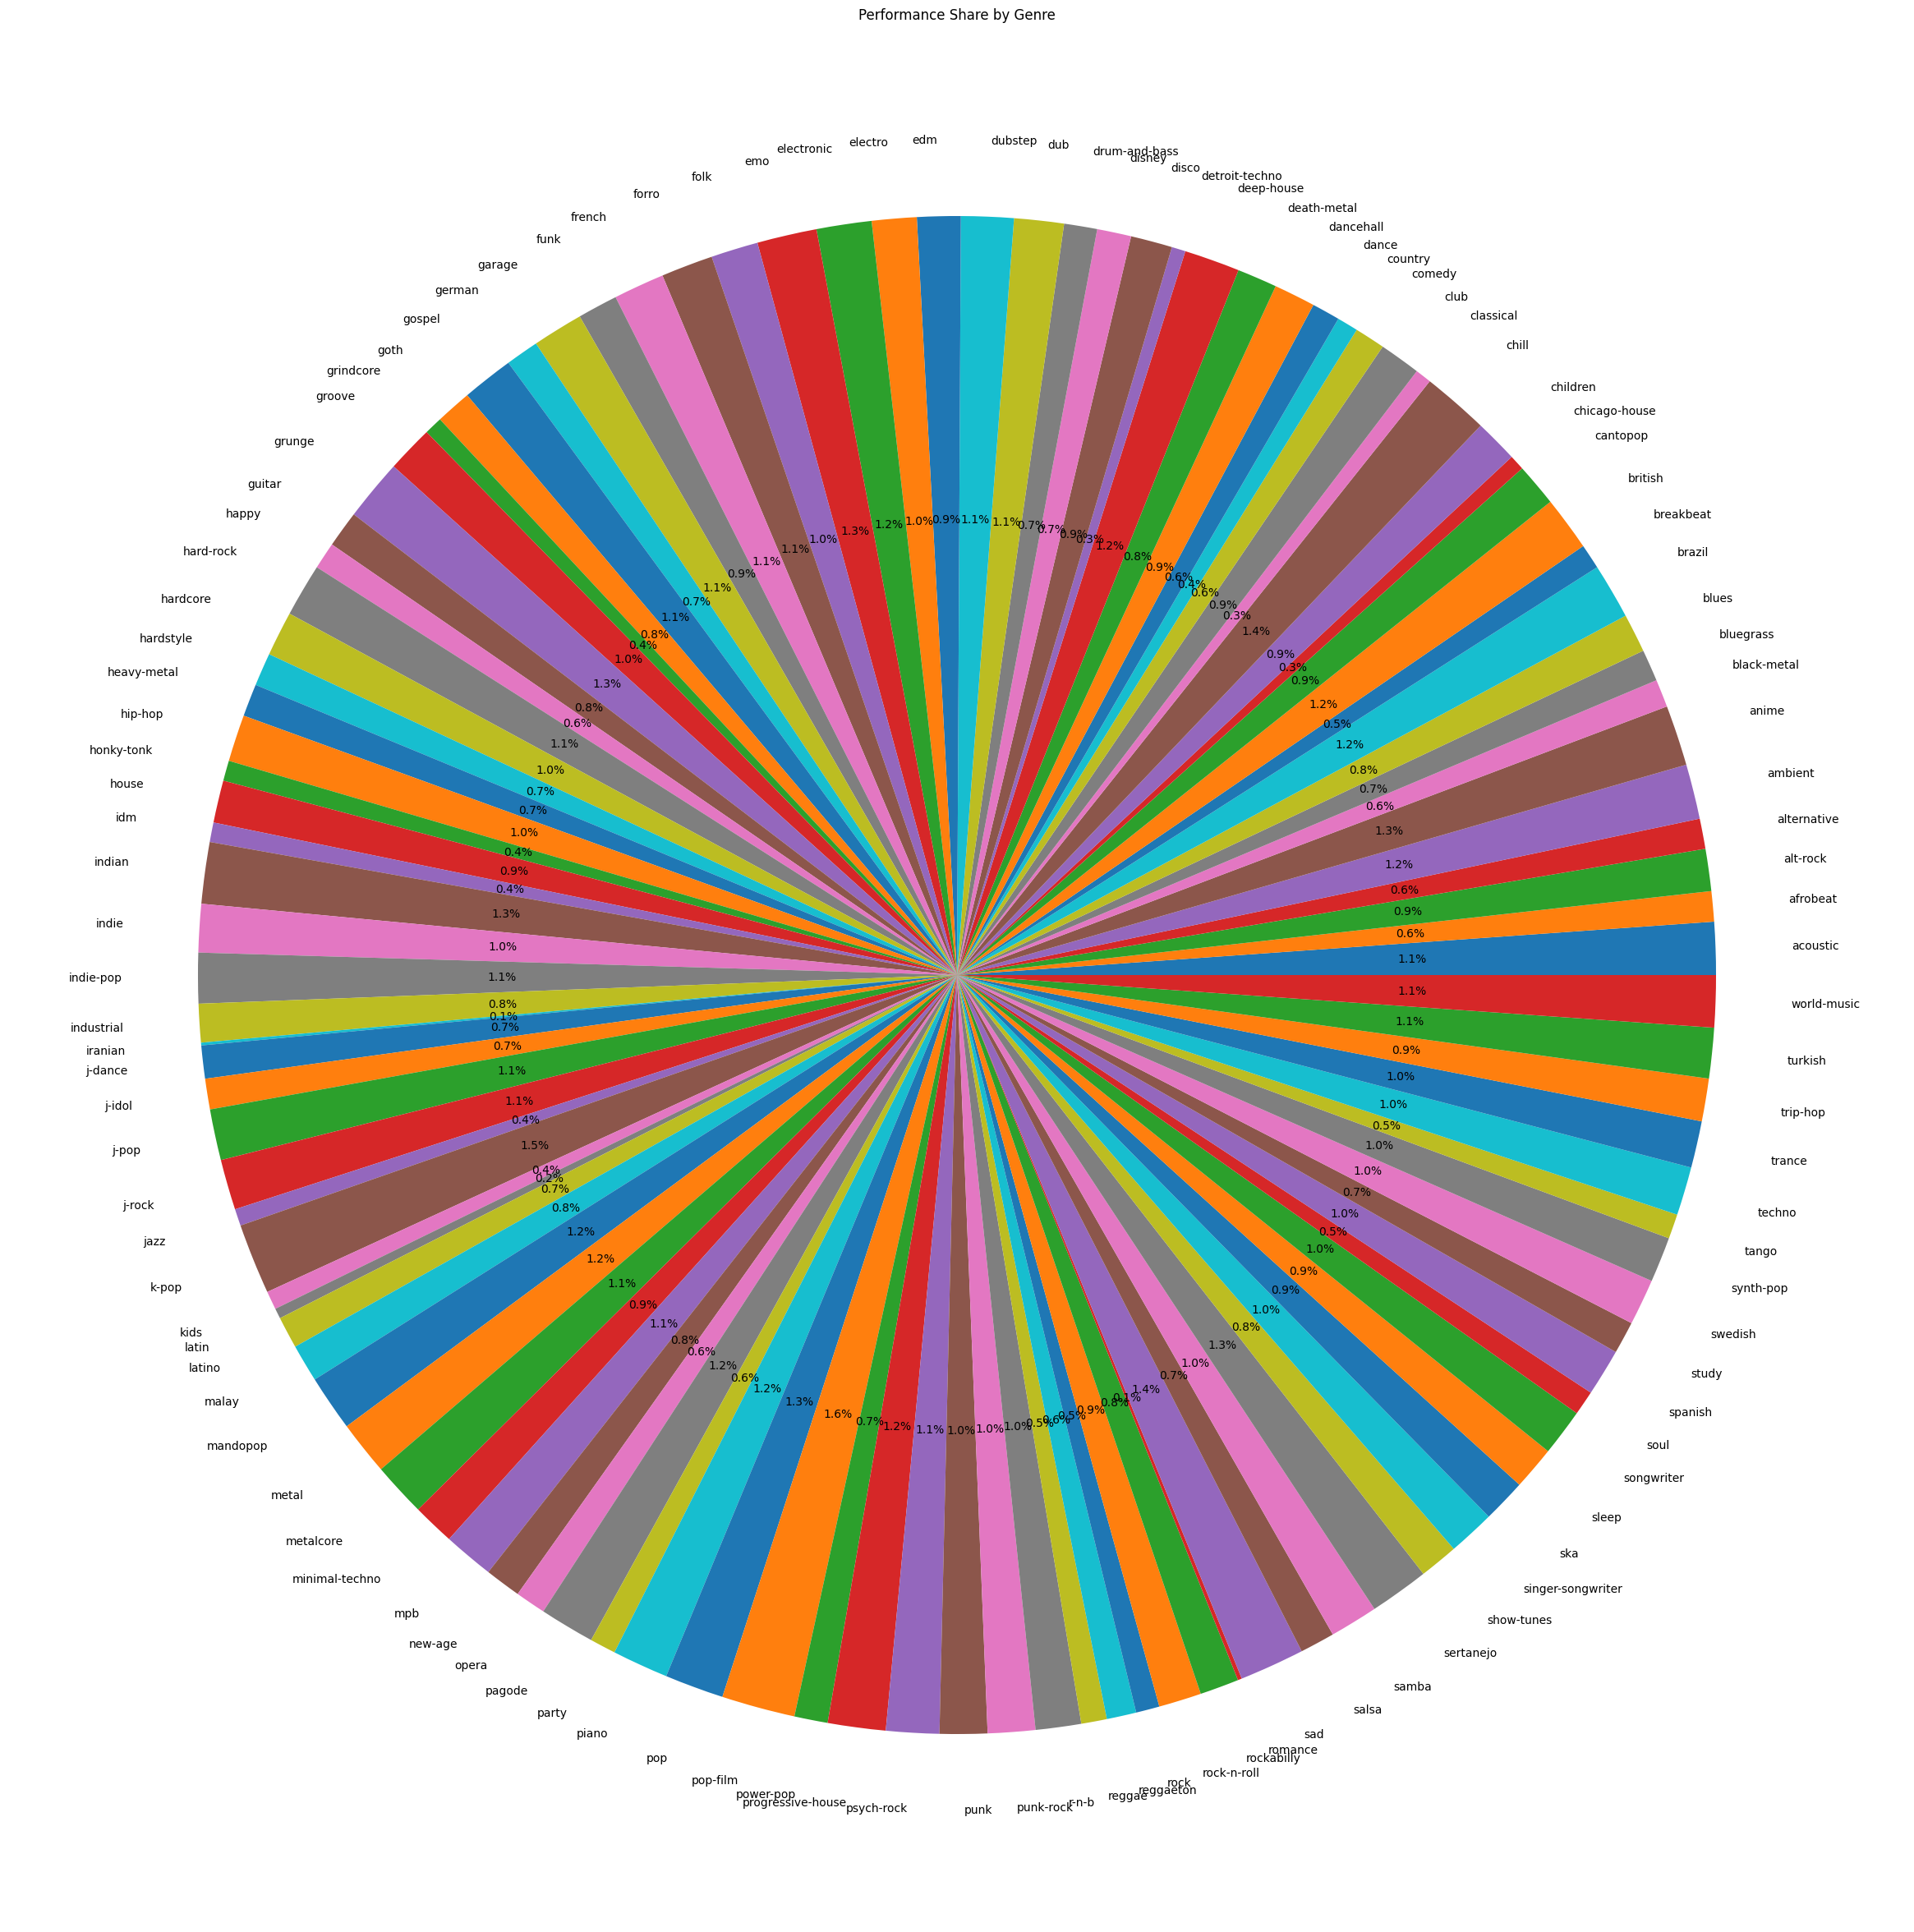

In [69]:
genre_performance = df.groupby("track_genre")["popularity"].sum()
genre_performance.plot.pie(autopct='%1.1f%%',
    figsize=(30, 30),
    title='Performance Share by Genre')
plt.ylabel('')  
plt.savefig('piechart.png')

In [ ]:
print(f"Original size of DataSet : {df.size}")
df = df.drop_duplicates(subset=['track_id'])
df = df.sort_values(by='duration_ms', ascending=True)
print(f"Reduced size of DataSet : {df.size}\n")

list_of_data = []
for names in df.keys():
    list_of_data.append(names)

list_of_data.pop(0)

print(list_of_data)

Original size of DataSet : 1710000


KeyError: Index(['track_id'], dtype='object')

Define the the parameters of the model: Y ~ X

In [59]:
X = np.array(df[["in_apple_charts", "in_spotify_charts", "in_spotify_playlists", "in_deezer_charts"]])
Y = np.array(df["in_apple_playlists"])
print(X.size)
print(Y.size)
#threshold = 100000
#series = pd.Series(df["duration_ms"])
#length = series[series < threshold].count()
#print(f"valeur tronquée = {length}")
#X = X[:length]
#Y = Y[:length]

KeyError: "None of [Index(['in_apple_charts', 'in_spotify_charts', 'in_spotify_playlists',\n       'in_deezer_charts'],\n      dtype='object')] are in the [columns]"

Create the model, test bach and the train bach

In [53]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}\n")

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(f"{predictions.head()}\n")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}\n")

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


Training set size: 762
Testing set size: 191

   Actual   Predicted
0       7   18.088897
1      10   47.582123
2       6   23.205728
3     113   35.637689
4     154  104.645014

Mean Squared Error: 2982.3020329218425

R-squared score: 0.5563080394136981


ValueError: x and y must be the same size

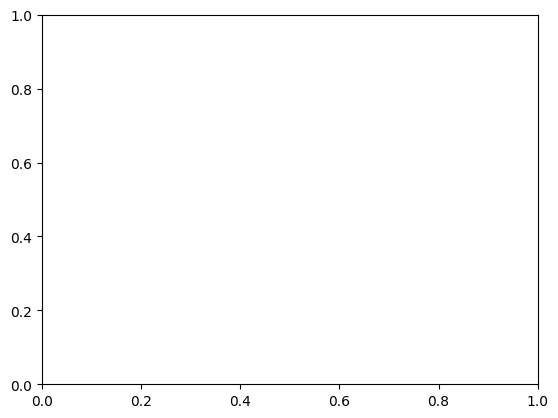

In [54]:
plt.scatter(X_test, y_test, color='blue', label='Actual')


plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.xlabel('loudness (dB)')
plt.ylabel('energy [0,1]')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

3D plot

In [30]:
X_mult = df[["loudness", "valence"]]
Y_mult = Y

model_mult = LinearRegression()
model_mult.fit(X_mult, Y_mult)

LinearRegression()

C:\Users\lucah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


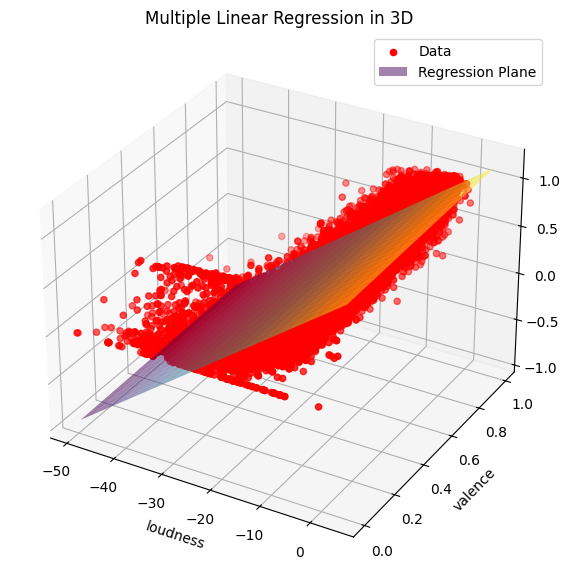

In [ ]:
x1_range = np.linspace(X_mult["loudness"].min(), X_mult["loudness"].max(), 20)
x2_range = np.linspace(X_mult["valence"].min(), X_mult["valence"].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict y for the grid
x_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_pred_mult = model_mult.predict(x_grid).reshape(x1_grid.shape)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(X_mult["loudness"], X_mult["valence"], Y_mult, color='red', label='Data')

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_mult, alpha=0.5, cmap='viridis', label='Regression Plane')

ax.set_xlabel("loudness")
ax.set_ylabel("valence")
ax.set_zlabel("energy")
ax.set_title('Multiple Linear Regression in 3D')
plt.legend()
plt.show()

In [ ]:
x1_range = np.linspace(X_mult["loudness"].min(), X_mult["loudness"].max(), 20)
x2_range = np.linspace(X_mult["valence"].min(), X_mult["valence"].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)


x_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_pred_mult = model_mult.predict(x_grid).reshape(x1_grid.shape)


fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=X_mult["loudness"], y=X_mult["valence"], z=Y_mult,
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Data'
))


fig.add_trace(go.Surface(
    x=x1_grid, y=x2_grid, z=y_pred_mult,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression Plane'
))

fig.update_layout(
    scene=dict(
        xaxis_title="loudness",
        yaxis_title="valence",
        zaxis_title="energy"
    ),
    title='Interactive 3D Regression Plot'
)

fig.show()

C:\Users\lucah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [55]:
print(df["duration_ms"]/(1000*60))

0         3.844433
1         2.493500
2         3.513767
3         3.365550
4         3.314217
            ...   
113995    6.416650
113996    6.416667
113997    4.524433
113998    4.731550
113999    4.030433
Name: duration_ms, Length: 114000, dtype: float64


converting ms to min"sec'

In [60]:
def convert_ms_to_min_sec(millis):
    seconds = millis // 1000
    minutes = seconds // 60
    remaning_seconds = round((seconds % 60), 2)
    return minutes, remaning_seconds

print(convert_ms_to_min_sec(df["duration_ms"]))

(0         3
1         2
2         3
3         3
4         3
         ..
113995    6
113996    6
113997    4
113998    4
113999    4
Name: duration_ms, Length: 114000, dtype: int64, 0         50
1         29
2         30
3         21
4         18
          ..
113995    24
113996    25
113997    31
113998    43
113999     1
Name: duration_ms, Length: 114000, dtype: int64)
